# 1. Explain the dataset

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests

In [53]:
dataset=pd.read_csv("Advertising.csv")
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Removing the unwanted column(<i>"Unnamed: 0"</i>)

In [54]:
data1=dataset.drop(['Unnamed: 0'],axis=1)

In [55]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:>

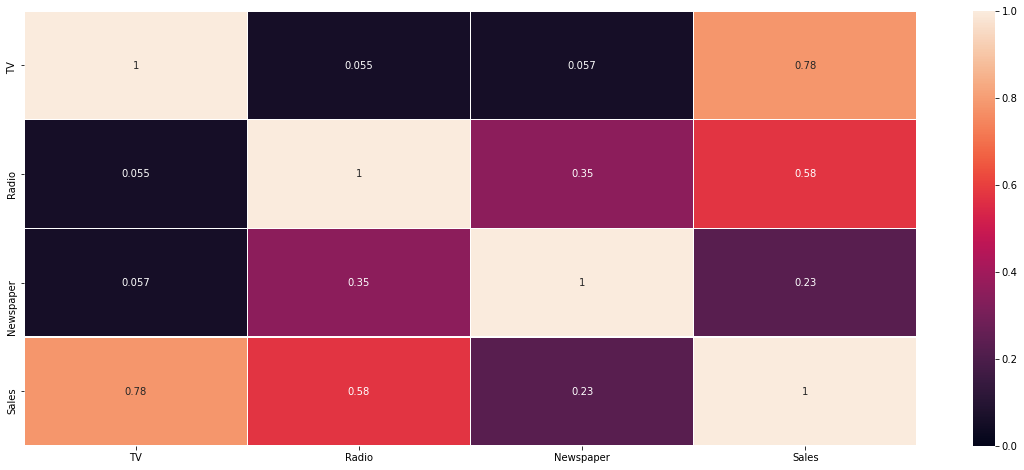

In [56]:
corrmatrix=data1.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0,vmax=1,annot=True,linewidth=0.3)

## <u>Observation:</u><p>Sales revenue has high correlation with the amount spent via TV advertisements and a moderate dependence on Radio advertisement

# 2.Check the summary statistics and discuss the max, min, avg, median,and percentiles.

In [57]:

des=data1.describe()
des

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## <i> max, min Values</i>

#### <p>Maximum advertisement amount was spent on TV; the minimum on Radio</p>

## <i>avg, median</i>

In [58]:
des[1:2]

,TV,Radio,Newspaper,Sales
mean,147.0425,23.264,30.554,14.0225


#### Mean value of advertisement spendings are higher on TV.

In [59]:
data1_median=pd.DataFrame(data1.median())
data1_median.columns=["Median spendings"]
data1_median

,Median spendings
TV,149.75
Radio,22.90
Newspaper,25.75
Sales,12.90


# <i>percentiles</i>

### Out of the 200 entries in each advertisement stream, the percentile data expalins how datas are distributed. The bottom and top percentile values can be found from the table

In [60]:
des[4:7]

,TV,Radio,Newspaper,Sales
25%,74.375,9.975,12.75,10.375
50%,149.750,22.900,25.75,12.900
75%,218.825,36.525,45.10,17.400


Text(0.5, 0, 'Advertisement streams')

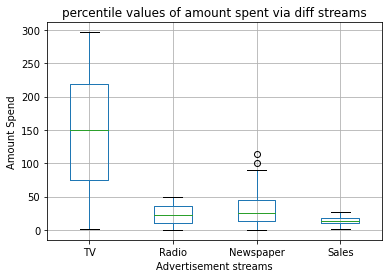

In [61]:
data1.boxplot()
plt.title("percentile values of amount spent via diff streams")
plt.ylabel("Amount Spend")
plt.xlabel("Advertisement streams")


# 3.The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings.

### Ho:Same mean amount was spent for the three advertisements (TV , Radio and Newspaper)

### Ha: Mean amount spent for the three advertisements (TV , Radio and Newspaper) are different

In [62]:
alpha=0.05
dfn=3-1;
dfd=200-1
critical_value=stats.f.ppf(alpha, dfn, dfd)


In [63]:
data1.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [64]:
statistic,pvalue=stats.f_oneway(data1['TV'],data1['Radio'],data1['Newspaper'])
if pvalue<alpha:
    print('We Reject Null Hypothesis(Ho); Mean amount spent for the three advertisements (TV , Radio and Newspaper) are different¶')
else:
    print('Same mean amount was spent for the three advertisements (TV , Radio and Newspaper)')

We Reject Null Hypothesis(Ho); Mean amount spent for the three advertisements (TV , Radio and Newspaper) are different¶


In [65]:
print('F-statistics computed:',statistic)
print('critical_value computed:',critical_value)

F-statistics computed: 358.8514595342597
critical_value computed: 0.05130651777554282


In [66]:
print('significance level:',alpha)
print('P_Value:',pvalue)


significance level: 0.05
P_Value: 4.552931539744962e-103


## <i><u>Observation:</u> Mean amount spent for the three advertisements (TV , Radio and Newspaper) are different</i>

In [67]:
Stream_wise=pd.DataFrame(data1.mean(axis=0,skipna = True))
Stream_wise.columns=['Mean amount']
Stream_wise

,Mean amount
TV,147.0425
Radio,23.2640
Newspaper,30.5540
Sales,14.0225
